# Loading libraries

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Importing data

In [34]:
FDI2 = pd.read_excel('FDI2.xlsx')

# Exploring data

In [35]:
FDI2.head()

,payscode,codepays,Année,ide,toc,tcr,fbcf,climatdaffaire,scoreeasedoingbusiness,caff,edb,crp,BUF,invf,finfree,CM
0,BGD,1,2004,4.489054e+08,38953960.63,59.512658,18286460936,47.380000,70.0,63.380000,66.00,0.11,55.0,50.0,70.0,10.671695
1,BGD,1,2005,7.605043e+08,51935441.53,64.327475,20071885132,42.400000,70.0,70.066667,61.30,0.06,55.0,50.0,70.0,4.751541
2,BGD,1,2006,4.565232e+08,59714312.41,68.933233,22056583775,50.916667,70.0,72.800000,63.90,-0.07,70.5,70.0,70.0,5.361124
3,BGD,1,2007,6.510297e+08,64798835.89,68.874875,23632938587,40.266667,70.0,69.450000,65.36,-0.18,70.3,60.0,60.0,10.969166
4,BGD,1,2008,1.328423e+09,62836842.93,68.598275,25952536543,36.650000,70.0,71.450000,67.00,-0.25,68.4,60.0,60.0,12.791560


In [36]:
FDI2.tail()

,payscode,codepays,Année,ide,toc,tcr,fbcf,climatdaffaire,scoreeasedoingbusiness,caff,edb,crp,BUF,invf,finfree,CM
325,TUR,22,2014,1.333700e+10,35361166.84,2.188542,292106000000,68.933333,83.400,NaN,NaN,NaN,NaN,NaN,NaN,23.405529
326,TUR,22,2015,1.927400e+10,34868314.46,2.720009,319228000000,67.200000,77.500,NaN,NaN,NaN,NaN,NaN,NaN,21.851067
327,TUR,22,2016,1.395000e+10,34681331.76,3.020135,326401000000,67.483333,73.980,NaN,NaN,NaN,NaN,NaN,NaN,19.750290
328,TUR,22,2017,1.154600e+10,34774823.11,3.648133,353331000000,66.566667,72.900,NaN,NaN,NaN,NaN,NaN,NaN,26.486011
329,TUR,22,2018,1.306100e+10,34728077.44,4.828370,351244000000,66.133333,73.875,NaN,NaN,NaN,NaN,NaN,NaN,19.176135


# rename columns

In [37]:
FDI2.rename(columns = {'payscode': 'id_countries', 'Année': 'year' , 'codepays': 'ID_countries' , 'ide' : 'fdi', 'toc' : 'commercial_opening_rate', 'CM' : 'Stock_Market'}, inplace = True)

In [38]:
FDI2.rename(columns = {'tcr' : 'Exchange_rate' , 'fbcf' : 'gross_fixed_capital_formation' ,  'climatdaffaire' : 'business_climate',   'cm' : 'stock_market'}, inplace = True)

# Convert ID_countries and year to string

In [39]:
FDI2['ID_countries'] = FDI2['ID_countries'].astype('string')
FDI2.dtypes

id_countries                      object
ID_countries                      string
year                               int64
fdi                              float64
commercial_opening_rate          float64
Exchange_rate                    float64
gross_fixed_capital_formation      int64
business_climate                 float64
scoreeasedoingbusiness           float64
caff                             float64
edb                              float64
crp                              float64
BUF                              float64
invf                             float64
finfree                          float64
Stock_Market                     float64
dtype: object

In [40]:
FDI2['year'] = FDI2['year'].astype('string')
FDI2.dtypes

id_countries                      object
ID_countries                      string
year                              string
fdi                              float64
commercial_opening_rate          float64
Exchange_rate                    float64
gross_fixed_capital_formation      int64
business_climate                 float64
scoreeasedoingbusiness           float64
caff                             float64
edb                              float64
crp                              float64
BUF                              float64
invf                             float64
finfree                          float64
Stock_Market                     float64
dtype: object

# convert year to datetime

In [41]:
FDI2['year'] = pd.to_datetime(FDI2['year'])
FDI2.dtypes

id_countries                             object
ID_countries                             string
year                             datetime64[ns]
fdi                                     float64
commercial_opening_rate                 float64
Exchange_rate                           float64
gross_fixed_capital_formation             int64
business_climate                        float64
scoreeasedoingbusiness                  float64
caff                                    float64
edb                                     float64
crp                                     float64
BUF                                     float64
invf                                    float64
finfree                                 float64
Stock_Market                            float64
dtype: object

In [42]:
FDI2.head()

,id_countries,ID_countries,year,fdi,commercial_opening_rate,Exchange_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,caff,edb,crp,BUF,invf,finfree,Stock_Market
0,BGD,1,2004-01-01,4.489054e+08,38953960.63,59.512658,18286460936,47.380000,70.0,63.380000,66.00,0.11,55.0,50.0,70.0,10.671695
1,BGD,1,2005-01-01,7.605043e+08,51935441.53,64.327475,20071885132,42.400000,70.0,70.066667,61.30,0.06,55.0,50.0,70.0,4.751541
2,BGD,1,2006-01-01,4.565232e+08,59714312.41,68.933233,22056583775,50.916667,70.0,72.800000,63.90,-0.07,70.5,70.0,70.0,5.361124
3,BGD,1,2007-01-01,6.510297e+08,64798835.89,68.874875,23632938587,40.266667,70.0,69.450000,65.36,-0.18,70.3,60.0,60.0,10.969166
4,BGD,1,2008-01-01,1.328423e+09,62836842.93,68.598275,25952536543,36.650000,70.0,71.450000,67.00,-0.25,68.4,60.0,60.0,12.791560


I decided to drop the following columns because of ...

In [43]:
FDI3= FDI2.drop(['caff', 'edb', 'crp', 'ID_countries'], axis=1)

In [44]:
display (FDI3)

,id_countries,year,fdi,commercial_opening_rate,Exchange_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,BUF,invf,finfree,Stock_Market
0,BGD,2004-01-01,4.489054e+08,38953960.63,59.512658,18286460936,47.380000,70.000,55.0,50.0,70.0,10.671695
1,BGD,2005-01-01,7.605043e+08,51935441.53,64.327475,20071885132,42.400000,70.000,55.0,50.0,70.0,4.751541
2,BGD,2006-01-01,4.565232e+08,59714312.41,68.933233,22056583775,50.916667,70.000,70.5,70.0,70.0,5.361124
3,BGD,2007-01-01,6.510297e+08,64798835.89,68.874875,23632938587,40.266667,70.000,70.3,60.0,60.0,10.969166
4,BGD,2008-01-01,1.328423e+09,62836842.93,68.598275,25952536543,36.650000,70.000,68.4,60.0,60.0,12.791560
...,...,...,...,...,...,...,...,...,...,...,...,...
325,TUR,2014-01-01,1.333700e+10,35361166.84,2.188542,292106000000,68.933333,83.400,NaN,NaN,NaN,23.405529
326,TUR,2015-01-01,1.927400e+10,34868314.46,2.720009,319228000000,67.200000,77.500,NaN,NaN,NaN,21.851067
327,TUR,2016-01-01,1.395000e+10,34681331.76,3.020135,326401000000,67.483333,73.980,NaN,NaN,NaN,19.750290
328,TUR,2017-01-01,1.154600e+10,34774823.11,3.648133,353331000000,66.566667,72.900,NaN,NaN,NaN,26.486011


# lower case the variables

In [45]:
FDI3.columns = list(map(lambda x: x.lower(), FDI3.columns))
FDI3.columns.unique()

Index(['id_countries', 'year', 'fdi', 'commercial_opening_rate',
       'exchange_rate', 'gross_fixed_capital_formation', 'business_climate',
       'scoreeasedoingbusiness', 'buf', 'invf', 'finfree', 'stock_market'],
      dtype='object')

# exploring the data afer modification

In [46]:
FDI3.shape

(330, 12)

In [47]:
FDI3.dtypes

id_countries                             object
year                             datetime64[ns]
fdi                                     float64
commercial_opening_rate                 float64
exchange_rate                           float64
gross_fixed_capital_formation             int64
business_climate                        float64
scoreeasedoingbusiness                  float64
buf                                     float64
invf                                    float64
finfree                                 float64
stock_market                            float64
dtype: object

In [48]:
FDI3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id_countries                   330 non-null    object        
 1   year                           330 non-null    datetime64[ns]
 2   fdi                            330 non-null    float64       
 3   commercial_opening_rate        330 non-null    float64       
 4   exchange_rate                  330 non-null    float64       
 5   gross_fixed_capital_formation  330 non-null    int64         
 6   business_climate               330 non-null    float64       
 7   scoreeasedoingbusiness         330 non-null    float64       
 8   buf                            165 non-null    float64       
 9   invf                           165 non-null    float64       
 10  finfree                        165 non-null    float64       
 11  stock_market       

In [49]:
list (FDI3 ['fdi'].unique())

[448905400.7,
 760504265.8,
 456523167.7,
 651029738.1,
 1328422987.0,
 901286583.1,
 1232258247.0,
 1264725163.0,
 1584403460.0,
 2602962095.0,
 2539190940.0,
 2831152765.0,
 2332724781.0,
 1810395804.0,
 2940222420.0,
 3072550962.0,
 4098122931.0,
 7874476255.0,
 13875270457.0,
 10296720634.0,
 3896664559.0,
 1842900000.0,
 2103810000.0,
 1788110000.0,
 1989040000.0,
 1093600000.0,
 2609370000.0,
 1562800000.0,
 2020340000.0,
 1222580000.0,
 18181190855.0,
 15459981604.0,
 19378093068.0,
 44579492464.0,
 50716402711.0,
 31480932200.0,
 82389933624.0,
 102427000000.0,
 92568379495.0,
 75211028087.0,
 87713987797.0,
 60334050668.0,
 73377909022.0,
 68885072606.0,
 78162572753.0,
 68117272181.0,
 104109000000.0,
 124082000000.0,
 156249000000.0,
 171535000000.0,
 131057000000.0,
 243703000000.0,
 280072000000.0,
 241214000000.0,
 290928000000.0,
 268097000000.0,
 242489000000.0,
 174750000000.0,
 166084000000.0,
 203492000000.0,
 881851385.0,
 1156000000.0,
 1841000000.0,
 1686736540.0,

In [50]:
FDI3 ['fdi'].unique()

array([ 4.48905401e+08,  7.60504266e+08,  4.56523168e+08,  6.51029738e+08,
        1.32842299e+09,  9.01286583e+08,  1.23225825e+09,  1.26472516e+09,
        1.58440346e+09,  2.60296210e+09,  2.53919094e+09,  2.83115276e+09,
        2.33272478e+09,  1.81039580e+09,  2.94022242e+09,  3.07255096e+09,
        4.09812293e+09,  7.87447626e+09,  1.38752705e+10,  1.02967206e+10,
        3.89666456e+09,  1.84290000e+09,  2.10381000e+09,  1.78811000e+09,
        1.98904000e+09,  1.09360000e+09,  2.60937000e+09,  1.56280000e+09,
        2.02034000e+09,  1.22258000e+09,  1.81811909e+10,  1.54599816e+10,
        1.93780931e+10,  4.45794925e+10,  5.07164027e+10,  3.14809322e+10,
        8.23899336e+10,  1.02427000e+11,  9.25683795e+10,  7.52110281e+10,
        8.77139878e+10,  6.03340507e+10,  7.33779090e+10,  6.88850726e+10,
        7.81625728e+10,  6.81172722e+10,  1.04109000e+11,  1.24082000e+11,
        1.56249000e+11,  1.71535000e+11,  1.31057000e+11,  2.43703000e+11,
        2.80072000e+11,  

# cheking missing values

In [51]:
FDI3.shape[0]

330

In [52]:
FDI3.isna().sum()/FDI3.shape[0]*100

id_countries                      0.0
year                              0.0
fdi                               0.0
commercial_opening_rate           0.0
exchange_rate                     0.0
gross_fixed_capital_formation     0.0
business_climate                  0.0
scoreeasedoingbusiness            0.0
buf                              50.0
invf                             50.0
finfree                          50.0
stock_market                      0.0
dtype: float64

### Replacing with knn imputer

In [53]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(FDI3.drop(columns=['year','id_countries','fdi']))
imputed_df = pd.DataFrame(imputed, columns=(FDI3.drop(columns=['year','id_countries','fdi']).columns))
FDI3_KNN = pd.concat([imputed_df, FDI3[['year','id_countries','fdi']]], axis = 1)

In [54]:
FDI3_KNN

,commercial_opening_rate,exchange_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,buf,invf,finfree,stock_market,year,id_countries,fdi
0,38953960.63,59.512658,1.828646e+10,47.380000,70.000,55.000000,50.000000,70.000000,10.671695,2004-01-01,BGD,4.489054e+08
1,51935441.53,64.327475,2.007189e+10,42.400000,70.000,55.000000,50.000000,70.000000,4.751541,2005-01-01,BGD,7.605043e+08
2,59714312.41,68.933233,2.205658e+10,50.916667,70.000,70.500000,70.000000,70.000000,5.361124,2006-01-01,BGD,4.565232e+08
3,64798835.89,68.874875,2.363294e+10,40.266667,70.000,70.300000,60.000000,60.000000,10.969166,2007-01-01,BGD,6.510297e+08
4,62836842.93,68.598275,2.595254e+10,36.650000,70.000,68.400000,60.000000,60.000000,12.791560,2008-01-01,BGD,1.328423e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
325,35361166.84,2.188542,2.921060e+11,68.933333,83.400,63.800000,56.666667,53.333333,23.405529,2014-01-01,TUR,1.333700e+10
326,34868314.46,2.720009,3.192280e+11,67.200000,77.500,63.800000,56.666667,50.000000,21.851067,2015-01-01,TUR,1.927400e+10
327,34681331.76,3.020135,3.264010e+11,67.483333,73.980,65.733333,70.000000,63.333333,19.750290,2016-01-01,TUR,1.395000e+10
328,34774823.11,3.648133,3.533310e+11,66.566667,72.900,57.166667,40.000000,36.666667,26.486011,2017-01-01,TUR,1.154600e+10


# Replacing the NAN values by the median 


In [55]:
# FDI3[(FDI3['buf'].isna() == True) & (FDI3['invf'].isna()==True) & (FDI3['finfree'].isna()==True)]
# display (FDI3)

In [56]:
# FDI3['buf'].fillna(FDI3['buf'].median(), inplace=True)

In [57]:
# display(FDI3)

In [58]:
# FDI3['invf'].fillna(FDI3['invf'].median(), inplace=True)

In [59]:
# FDI3['finfree'].fillna(FDI3['finfree'].median(), inplace=True)

# Check again the missing values

In [60]:
FDI3_KNN.isna().sum()

commercial_opening_rate          0
exchange_rate                    0
gross_fixed_capital_formation    0
business_climate                 0
scoreeasedoingbusiness           0
buf                              0
invf                             0
finfree                          0
stock_market                     0
year                             0
id_countries                     0
fdi                              0
dtype: int64

we have here a clean data

# describing the data

In [61]:
FDI3_KNN.describe().T

,count,mean,std,min,25%,50%,75%,max
commercial_opening_rate,330.0,6.454303e+07,1.170231e+08,-6.412492e-01,1.577948e+07,3.510331e+07,6.330626e+07,7.038409e+08
exchange_rate,330.0,1.331637e+03,4.823952e+03,1.232142e+00,3.329896e+00,2.486804e+01,7.921833e+01,4.086433e+04
gross_fixed_capital_formation,330.0,2.416401e+11,6.508859e+11,2.625409e+09,2.613547e+10,5.002675e+10,1.882652e+11,4.414250e+12
business_climate,330.0,5.992981e+01,8.639142e+00,3.378333e+01,5.419167e+01,5.926667e+01,6.659167e+01,7.495000e+01
scoreeasedoingbusiness,330.0,6.275875e+01,1.065464e+01,2.610000e+01,5.577375e+01,6.330000e+01,7.081500e+01,8.610000e+01
buf,330.0,6.837566e+01,9.082720e+00,4.000000e+01,6.283333e+01,6.873333e+01,7.379167e+01,8.780000e+01
invf,330.0,5.115657e+01,2.180826e+01,0.000000e+00,4.666667e+01,5.333333e+01,6.666667e+01,9.000000e+01
finfree,330.0,4.773737e+01,1.707598e+01,1.000000e+01,4.000000e+01,5.000000e+01,6.000000e+01,7.000000e+01
stock_market,330.0,4.147970e+01,3.298583e+01,5.339774e-02,1.847838e+01,3.291624e+01,5.383899e+01,1.680671e+02
fdi,330.0,1.828205e+10,4.312849e+10,-5.377929e+08,1.818047e+09,4.576957e+09,1.326800e+10,2.909280e+11


# number and object

In [62]:
numericals = FDI3_KNN.select_dtypes(np.number)
display(numericals.head())
categoricals = FDI3_KNN.select_dtypes(object)
display(categoricals.head())

,commercial_opening_rate,exchange_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,buf,invf,finfree,stock_market,fdi
0,38953960.63,59.512658,1.828646e+10,47.380000,70.0,55.0,50.0,70.0,10.671695,4.489054e+08
1,51935441.53,64.327475,2.007189e+10,42.400000,70.0,55.0,50.0,70.0,4.751541,7.605043e+08
2,59714312.41,68.933233,2.205658e+10,50.916667,70.0,70.5,70.0,70.0,5.361124,4.565232e+08
3,64798835.89,68.874875,2.363294e+10,40.266667,70.0,70.3,60.0,60.0,10.969166,6.510297e+08
4,62836842.93,68.598275,2.595254e+10,36.650000,70.0,68.4,60.0,60.0,12.791560,1.328423e+09


,id_countries
0,BGD
1,BGD
2,BGD
3,BGD
4,BGD


# Use seaborn library to construct distribution plots for the numerical variables

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


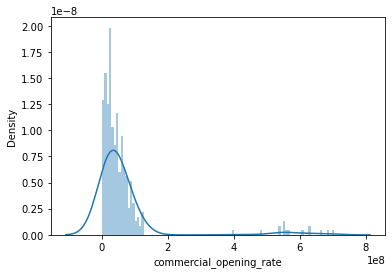

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


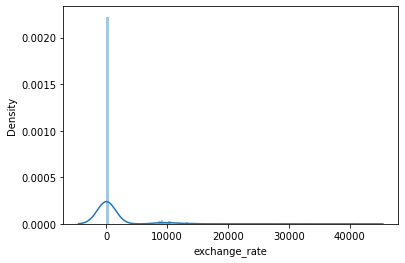

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


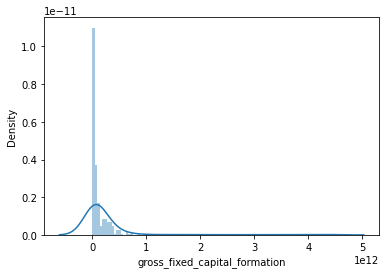

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


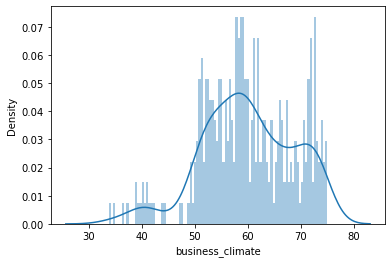

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


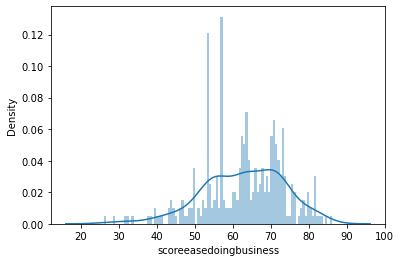

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


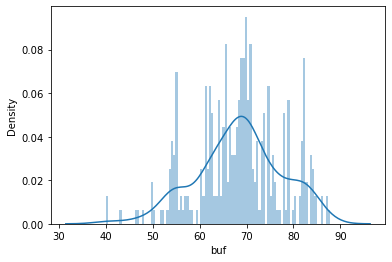

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


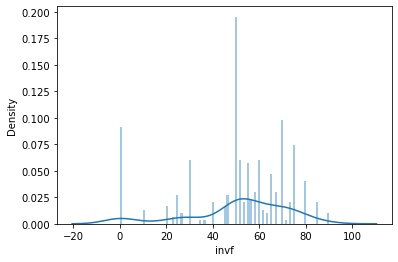

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


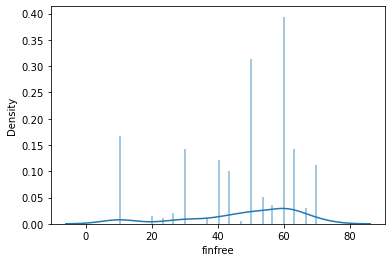

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


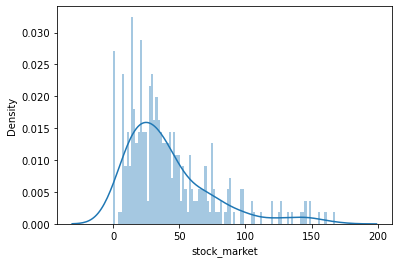

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


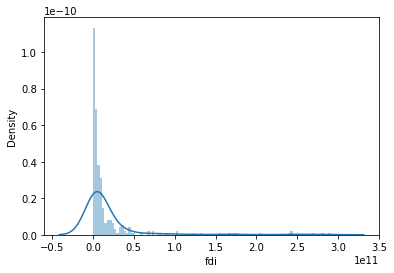

In [63]:
for col in numericals:
     sns.distplot(numericals[col],bins= 100)
     plt.show()

# plotting 

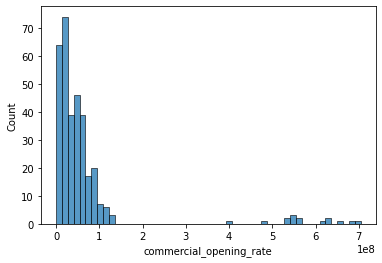

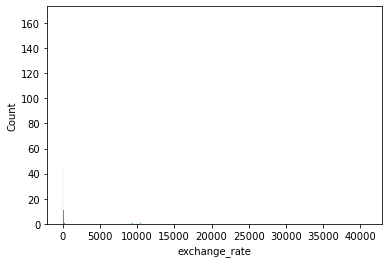

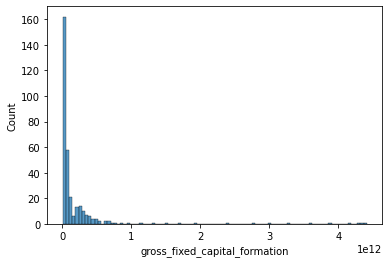

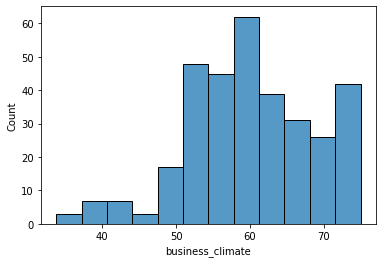

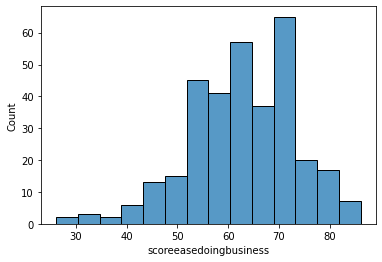

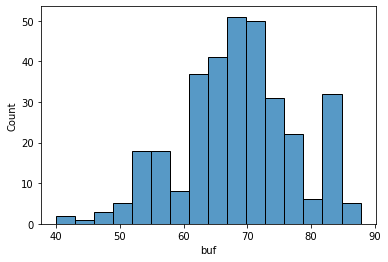

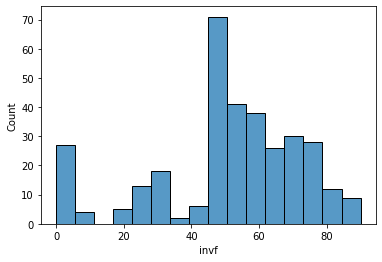

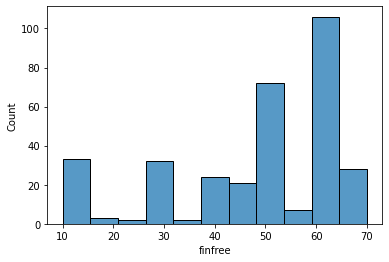

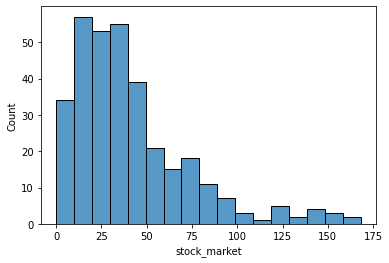

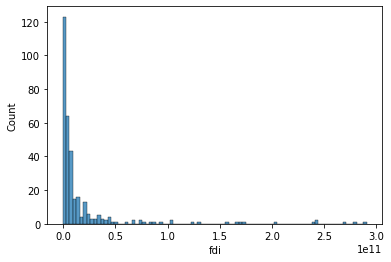

In [64]:
import matplotlib.pyplot as plt
def numericals_plot(df):
    for i in df.columns:
        sns.histplot(x=i, data = df);
        plt.show()
    return
    
numericals_plot(numericals)

In [65]:
#numeric_FDI3

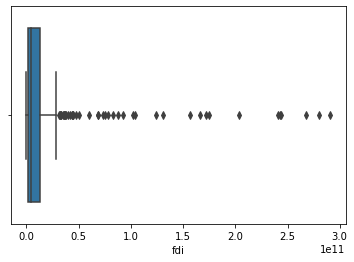

In [66]:
sns.boxplot(x=numericals['fdi'])
plt.show()

In [67]:
iqr = np.percentile(numericals['fdi'],75) - np.percentile(numericals['fdi'],25)
upper_limit = np.percentile(numericals['fdi'],75) + 1.5*iqr
lower_limit = np.percentile(numericals['fdi'],25) - 1.5*iqr

In [68]:
numeric_FDI3 = numericals[(numericals['fdi']>lower_limit) & (numericals['fdi']<upper_limit)]

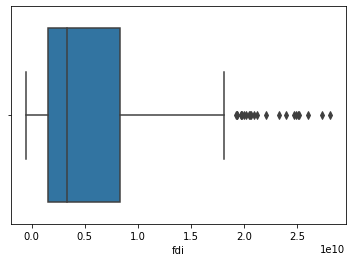

In [69]:
sns.boxplot(x=numeric_FDI3['fdi'])
plt.show()

### Logaritmic transformation

In [70]:
# numeric_FDI3['fdi_log'] = np.log(numeric_FDI3['fdi'])

In [71]:
numeric_FDI3.head()

,commercial_opening_rate,exchange_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,buf,invf,finfree,stock_market,fdi
0,38953960.63,59.512658,1.828646e+10,47.380000,70.0,55.0,50.0,70.0,10.671695,4.489054e+08
1,51935441.53,64.327475,2.007189e+10,42.400000,70.0,55.0,50.0,70.0,4.751541,7.605043e+08
2,59714312.41,68.933233,2.205658e+10,50.916667,70.0,70.5,70.0,70.0,5.361124,4.565232e+08
3,64798835.89,68.874875,2.363294e+10,40.266667,70.0,70.3,60.0,60.0,10.969166,6.510297e+08
4,62836842.93,68.598275,2.595254e+10,36.650000,70.0,68.4,60.0,60.0,12.791560,1.328423e+09


# power transormation

Check if any of the log transformations changes the result.

In [72]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(numericals)
numeric_FDI3 = pd.DataFrame(pt.transform(numericals), columns = numericals.columns  )
numeric_FDI3.head()

,commercial_opening_rate,exchange_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,buf,invf,finfree,stock_market,fdi
0,0.091316,0.587494,-0.774379,-1.417695,0.661596,-1.440617,-0.106297,1.591057,-1.081706,-0.444693
1,0.305318,0.619904,-0.707284,-1.895417,0.661596,-1.440617,-0.106297,1.591057,-1.580889,-0.431908
2,0.414890,0.648266,-0.639883,-1.055946,0.661596,0.198081,0.896537,1.591057,-1.517545,-0.444369
3,0.480856,0.647921,-0.590864,-2.088493,0.661596,0.175398,0.387938,0.742700,-1.061439,-0.436306
4,0.455876,0.646282,-0.524810,-2.399586,0.661596,-0.038130,0.387938,0.742700,-0.943724,-0.410158


In [73]:
# numeric_FDI3 = FDI3.apply(lambda x: np.log(x) if np.issubdtype(x.dtype, np.number) else x)

In [74]:
numeric_FDI3.describe().T

,count,mean,std,min,25%,50%,75%,max
commercial_opening_rate,330.0,-7.175447e-17,1.001519,-2.726421,-0.488424,0.017606,0.461905,3.148435
exchange_rate,330.0,9.251859e-17,1.001519,-1.527504,-0.964542,0.170815,0.704049,2.024589
gross_fixed_capital_formation,330.0,4.642751e-16,1.001519,-2.293179,-0.519930,-0.075541,0.762421,2.431483
business_climate,330.0,1.685520e-16,1.001519,-2.631364,-0.704674,-0.130020,0.762803,1.870386
scoreeasedoingbusiness,330.0,2.462677e-16,1.001519,-2.735960,-0.716744,-0.019406,0.748255,2.524387
buf,330.0,-6.546952e-16,1.001519,-2.780774,-0.643083,-0.000925,0.576968,2.303536
invf,330.0,6.341728e-17,1.001519,-2.198074,-0.267474,0.056725,0.725522,1.950404
finfree,330.0,2.714159e-16,1.001519,-1.879919,-0.647929,-0.005062,0.742700,1.591057
stock_market,330.0,-1.147230e-16,1.001519,-2.359208,-0.629804,-0.033728,0.591233,2.573010
fdi,330.0,5.744563e-17,1.001519,-3.671186,-0.392375,-0.300387,-0.045516,5.781305


# PLOTTING with transf


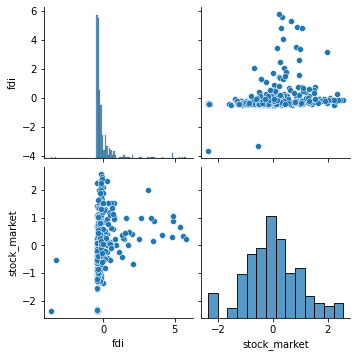

In [75]:
import seaborn as sns
sns.pairplot(numeric_FDI3[['fdi','stock_market' ]])


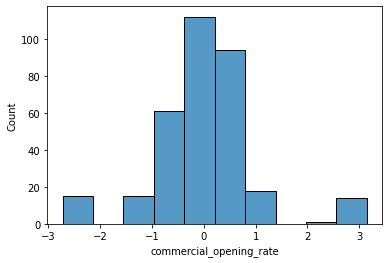

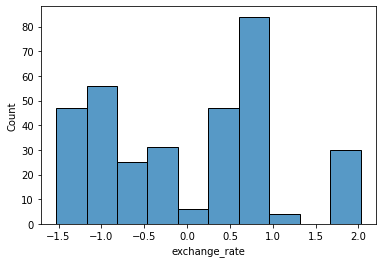

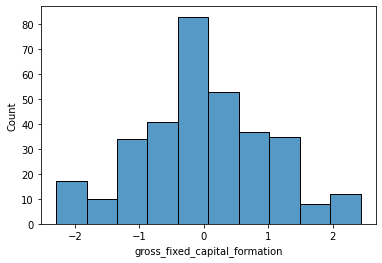

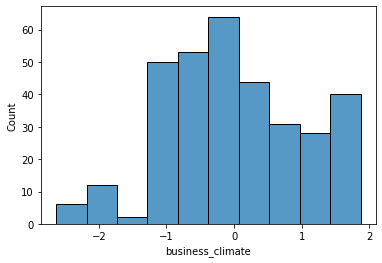

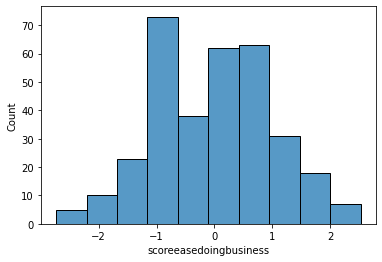

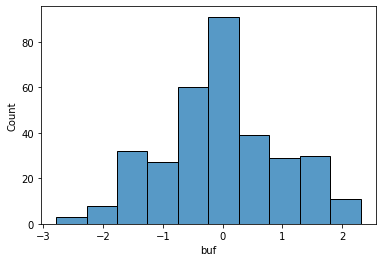

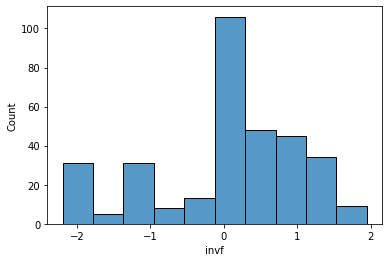

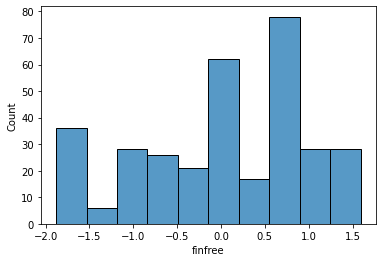

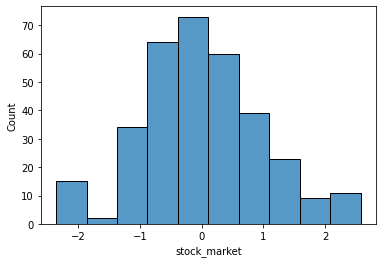

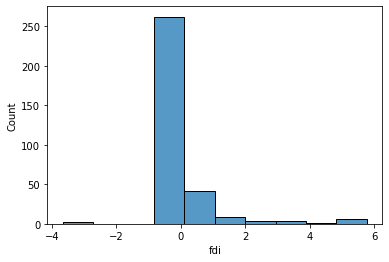

In [76]:
def numericals_plot2(df):
    for i in df.columns:
        sns.histplot(x=i, data = df, bins=10);
        plt.show()
    
numericals_plot2(numeric_FDI3)


# correlation

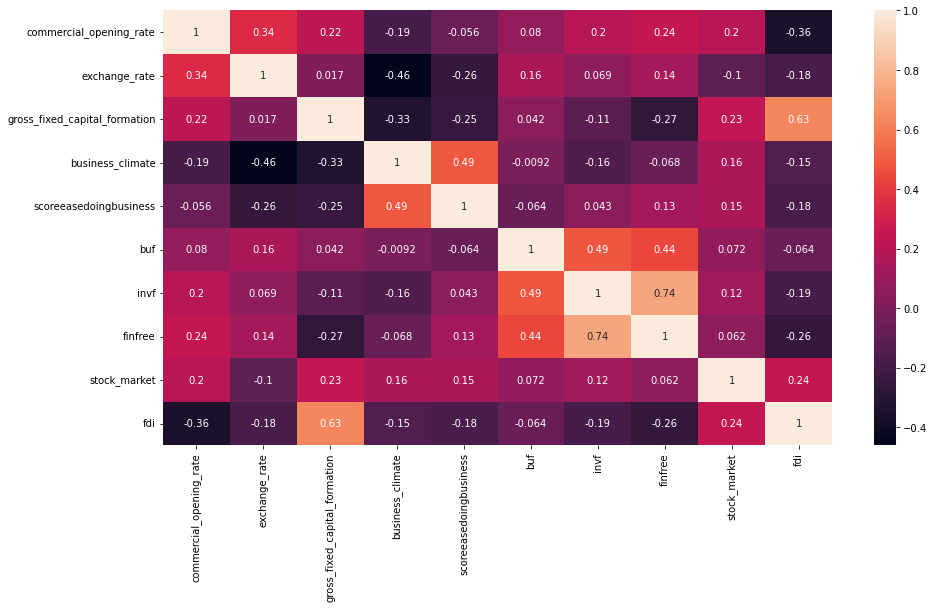

In [77]:
import seaborn as sb
dataplot=sb.heatmap(numeric_FDI3.corr(), annot=True,  )
plt.gcf().set_size_inches(15, 8)

In [78]:
#corr_FDI3 = numeric_FDI3[['fdi','gross_fixed_capital_formation','invf','finfree', 'stock market']].corr()
#corr_FDI3

 we have multicolinearity here with gross_fixed_capital_formation . We need to drop one of these columns. 
We will drop gross_fixed_capital_formation 

In [79]:
# we have multicolinearity here with gross_fixed_capital_formation . We need to drop one of these columns. 
# We will drop gross_fixed_capital_formation 

# numeric_FDI3 = numeric_FDI3.drop(['gross_fixed_capital_formation'], axis=1)

# Ploting fdi

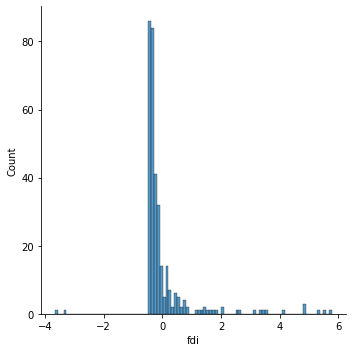

In [80]:
sns.displot(numeric_FDI3['fdi'])
plt.show()

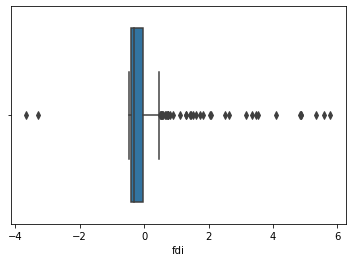

In [81]:
sns.boxplot(x=numeric_FDI3['fdi'])
plt.show()

In [82]:
iqr = np.percentile(numeric_FDI3['fdi'],75) - np.percentile(numeric_FDI3['fdi'],25)
upper_limit = np.percentile(numeric_FDI3['fdi'],75) + 1.5*iqr
lower_limit = np.percentile(numeric_FDI3['fdi'],25) - 1.5*iqr

In [83]:
numeric_FDI3 = numeric_FDI3[(numeric_FDI3['fdi']>lower_limit) & (numeric_FDI3['fdi']<upper_limit)]

In [84]:
# numeric_FDI3['fdi_log'] = np.log(numeric_FDI3['fdi']+1)

In [85]:
# sns.displot(numeric_FDI3['fdi_log'])

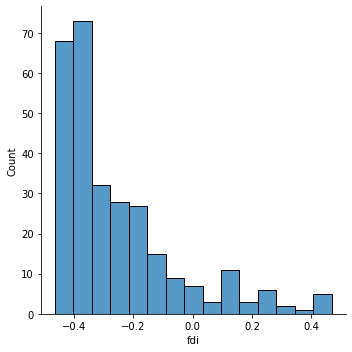

In [86]:
sns.displot(numeric_FDI3['fdi'])

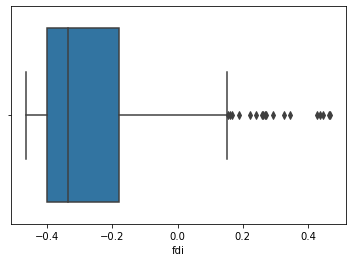

In [87]:
sns.boxplot(x=numeric_FDI3['fdi'])
plt.show()

In [88]:
#regression_line = lm.intercept_ + lm.coef_[0]*numeric_FDI3['stock market'] # b_0 + b_1 * x
#plt.plot(numeric_FDI3['stock market'], regression_line, c = 'orange')
#sns.scatterplot(x='stock market',y='fdi',data=numeric_FDI3)
#plt.show()

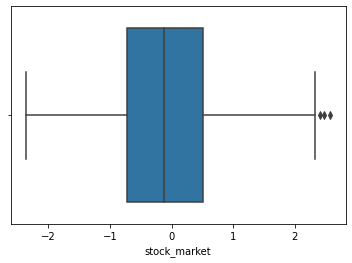

In [89]:
sns.boxplot(x=numeric_FDI3['stock_market'])
plt.show()

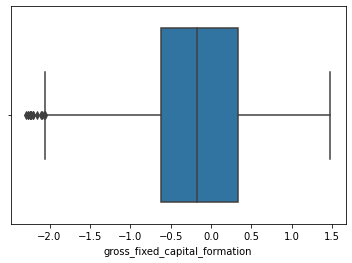

In [90]:
sns.boxplot(x=numeric_FDI3['gross_fixed_capital_formation'])
plt.show()

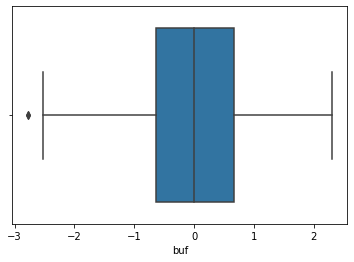

In [167]:
sns.boxplot(x=numeric_FDI3['buf'])
plt.show()

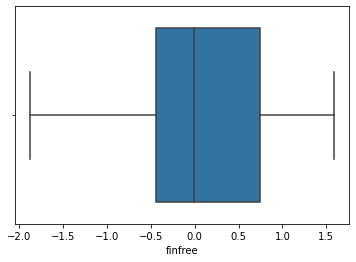

In [168]:
sns.boxplot(x=numeric_FDI3['finfree'])
plt.show()

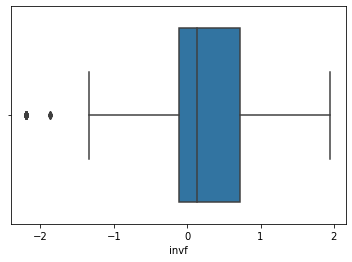

In [169]:
sns.boxplot(x=numeric_FDI3['invf'])
plt.show()

# split another variable

In [91]:
#y = numeric_FDI3['stock market']
#X = numeric_FDI3[['buf']] 

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [92]:
from sklearn.preprocessing import MinMaxScaler

# PowerTransformer()
#MinMaxtransformer = MinMaxScaler()
#MinMaxtransformer.fit(X_train)

#X_train_scaled = MinMaxtransformer.transform(X_train)
#X_test_scaled  = MinMaxtransformer.transform(X_test)

#X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#X_test_scaled_df  = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [93]:
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score

#y = y_train
#X = X_train_scaled_df

#lm = linear_model.LinearRegression()
#lm.fit(X_train_scaled_df,y_train)
#print(lm.intercept_)
#print(lm.coef_)
#print(lm.score(X,y))

In [94]:
#from sklearn.metrics import r2_score

#y_pred_train = lm.predict(X_train_scaled_df)
#y_pred_test  = lm.predict(X_test_scaled_df)
#r2_score(y_train, y_pred_train)


#from sklearn.metrics import r2_score
#y_pred = lm.predict(X)
#r2_score(y, y_pred)

In [95]:
#fig, ax = plt.subplots(2,2,figsize=(20,10))
#sns.scatterplot(x=y_train, y=y_pred_train, ax = ax[0,0])
#sns.histplot(x=y_train-y_pred_train, ax = ax[0,1], bins = 50)
#ax[0,0].plot(y_train, y_train, color = "black")
#sns.scatterplot(x=y_test, y=y_pred_test, ax = ax[1,0])
#sns.histplot(x=y_test-y_pred_test, ax = ax[1,1], bins=50)
#ax[1,0].plot(y_test, y_test, color="black")
#plt.show()

# split

In [96]:
y = numeric_FDI3['fdi']
X = numeric_FDI3.drop(columns='fdi') 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

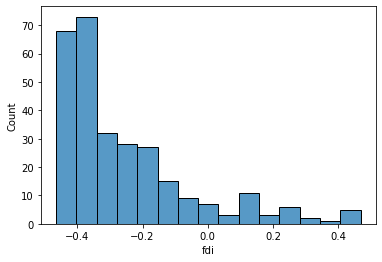

In [97]:
sns.histplot(y);

In [98]:
#y_powertransformer = PowerTransformer()
#y_powertransformer.fit(y)
#y_transformed = y_powertransformer.transform(y)
#y_transformed_s = pd.Series(y_transformed)

#y_powertransformer.inverse_transform(y_transformed_s)

#x_powertransformer = PowerTransformer()



# Normalization

In [99]:

from sklearn.preprocessing import MinMaxScaler

PowerTransformer()
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X_train)

X_train_minmax_scaled = MinMaxtransformer.transform(X_train)
X_test_minmax_scaled  = MinMaxtransformer.transform(X_test)

X_train_minmax_scaled_df = pd.DataFrame(X_train_minmax_scaled, columns=X_train.columns)
X_test_minmax_scaled_df  = pd.DataFrame(X_test_minmax_scaled, columns=X_test.columns)

In [100]:
#from sklearn.preprocessing import PowerTransformer
#powertransformer = PowerTransformer()
#powertransformer.fit(X_train)
#print(powertransformer.lambdas_)

#X_train_scaled = powertransformer.transform(X_train)
#X_test_scaled  = powertransformer.transform(X_test)

#X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#X_test_scaled_df  = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Let us have a look at the error rate for different k values

In [101]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
rmse_val = [] #to store rmse values for different k
knn_models = {}
for K in range(1,20):
    
    model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    model_knn.fit(X_train, y_train)  #fit the model
    
    knn_models[K] = model_knn 
    pred=model_knn.predict(X_test) #make prediction on test set
    error = (r2_score(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('r2_score value for k= ' , K , 'is:', error)

r2_score value for k=  1 is: 0.76319681947073
r2_score value for k=  2 is: 0.7281859147335912
r2_score value for k=  3 is: 0.7208666926099855
r2_score value for k=  4 is: 0.7340293641312896
r2_score value for k=  5 is: 0.7082797270490303
r2_score value for k=  6 is: 0.6915290400154877
r2_score value for k=  7 is: 0.6875440296096624
r2_score value for k=  8 is: 0.6679910974227496
r2_score value for k=  9 is: 0.643253028457637
r2_score value for k=  10 is: 0.6111123877181563
r2_score value for k=  11 is: 0.5802443816286822
r2_score value for k=  12 is: 0.549997329749286
r2_score value for k=  13 is: 0.5208094015381268
r2_score value for k=  14 is: 0.48948079152959656
r2_score value for k=  15 is: 0.47346961573738966
r2_score value for k=  16 is: 0.45269878854499845
r2_score value for k=  17 is: 0.43403379533132336
r2_score value for k=  18 is: 0.42026899711593746
r2_score value for k=  19 is: 0.4026267511849153


In [103]:
model_knn

KNeighborsRegressor(n_neighbors=19)

In [104]:
# Choose K=5
model_knn = neighbors.KNeighborsRegressor(n_neighbors = 4)
model_knn.fit(X_train, y_train)  #fit the model
    
knn_models[K] = model_knn 
pred_test=model_knn.predict(X_test) #make prediction on test set
pred_train=model_knn.predict(X_train) #make prediction on test set
print('r2_score_test: ', r2_score(y_test,pred_test))
print('r2_score_train: ', r2_score(y_train,pred_train))

r2_score_test:  0.7340293641312896
r2_score_train:  0.8256291972741249


In [ ]:
# rmse_lm_test_KNN= sqrt(mean_squared_error(y_test,pred))
# print (rmse_lm_test_KNN)

In [ ]:
# knn_models[K] = model_knn 
# pred=model_knn.predict(X_train) #make prediction on train set
# rmse_lm_train_KNN=sqrt(mean_squared_error(y_train,pred))
# print (rmse_lm_train_KNN)

In [143]:
r2_score_test_knn = r2_score(y_test,pred_test)

In [144]:
r2_score_train_knn = r2_score(y_train,pred_train)

In [145]:
matrix2= pd.DataFrame({'y_train': y_train, 'y_train_pred_lm': y_pred_train_lm, 'Residuals_train_lm': y_train - y_pred_train_lm, 'y_train_pred_knn': y_train_pred_knn, 'Residuals_train_knn':  y_train - y_train_pred_knn })

NameError: name 'y_pred_train_lm' is not defined

In [ ]:
matrix= pd.DataFrame({'Model': ['model_lm', 'model_knn'], 'Train': [r2_score_train,r2_score_train_knn], 'Test': [r2_score_test, r2_score_test_knn]})


In [ ]:
matrix

In [ ]:
y_train - y_pred_train_lm

In [ ]:
y_train - y_train_pred_knn

In [ ]:
y_train_pred_knn

In [ ]:
y_train

In [ ]:
pred_X_test_knn=model_knn.predict(X_test) #make prediction on test set
print (pred_X_test_knn)

In [ ]:

pred_X_train_knn=model_knn.predict(X_train) #make prediction on test set
print (pred_X_train_knn)

# plotting the rmse values against k values


<AxesSubplot:>

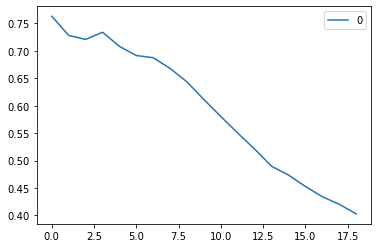

In [107]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

ValueError: x and y must have same first dimension, but have shapes (13,) and (1,)

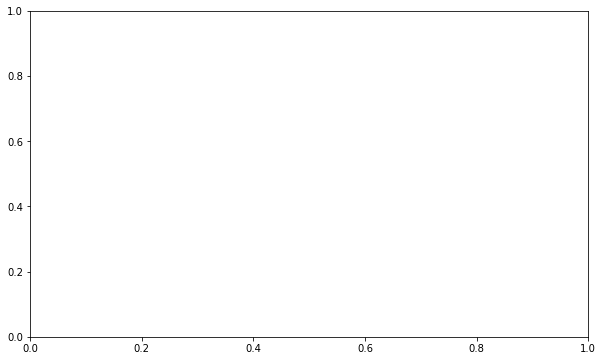

In [108]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15),error,color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('r2_score vs. k value')
plt.xticks(range(1,16))
plt.xlabel('K')
plt.ylabel('RMSE')

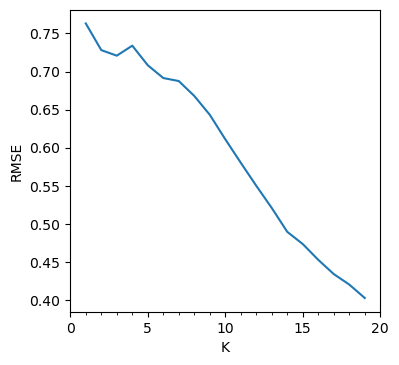

In [109]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(4,4), dpi = 100)
ax.plot(list(range(1,20)),rmse_val);
ax.set_xlim(0,20)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.set_xlabel("K")
ax.set_ylabel("RMSE")
plt.show()

In [110]:
y_test_pred_knn = knn_models[3].predict(X_test)
print (y_test_pred_knn)

[-0.38605844 -0.44085054 -0.35638381 -0.27210736 -0.42057805 -0.26136844
 -0.07425379 -0.23183237 -0.37762541 -0.37664929  0.0091571  -0.42768754
 -0.37664929 -0.45998136 -0.20140426 -0.35601892 -0.42100502 -0.42673536
  0.09936571  0.04758785  0.03899124 -0.41754503 -0.34315959 -0.24543396
 -0.37595076 -0.37162132 -0.21987209 -0.39004277 -0.39461385 -0.45998136
 -0.34939925 -0.37422271 -0.19964148 -0.23525006 -0.07425379 -0.39595923
  0.00867946 -0.27417181  0.00867946 -0.28475521 -0.26152702 -0.37595076
  0.23446877 -0.23525006  0.09603186  0.23446877 -0.43551111 -0.35950093
  0.00733637 -0.37671557  0.15146812 -0.41987817 -0.14373556 -0.33671746
  0.2713197  -0.40373596 -0.00935004 -0.24543396 -0.39124548 -0.35941031
  0.03016891 -0.36089422 -0.38259023 -0.37057916  0.00867946 -0.40235735
  0.1186635  -0.06135879 -0.40179681 -0.14373556 -0.44085054 -0.27417181
 -0.36719714 -0.10120184 -0.43035723 -0.24543396 -0.36744299 -0.11100494
 -0.24543396 -0.31318519 -0.37855737 -0.18207125 -0

In [111]:
y_train_pred_knn = knn_models[3].predict(X_train)
print (y_train_pred_knn)

[ 0.16510981 -0.22046855 -0.26136844  0.00295209 -0.39315977 -0.32191888
 -0.40179681 -0.26136844 -0.12080926 -0.38997662 -0.31656043 -0.37595076
 -0.37595076 -0.17146198 -0.16787263 -0.39124548 -0.2230325  -0.42587591
 -0.33671746 -0.38259023 -0.31762925 -0.35482934 -0.11708436 -0.16817093
 -0.26152702 -0.30513229 -0.39004277 -0.2302833  -0.42100502 -0.44488535
 -0.00935004 -0.40029118 -0.34052407 -0.23525006 -0.15587316 -0.2861857
 -0.35601892 -0.39595923 -0.36604057 -0.23999649 -0.34693124 -0.37762541
  0.23446877 -0.37664929 -0.27417181 -0.34688223 -0.42758189 -0.39124548
 -0.30936047  0.15146812  0.00295209 -0.37123443 -0.17684127 -0.33664342
 -0.39157712 -0.42758189 -0.28477638 -0.41987817 -0.36719714 -0.41433026
  0.00295209 -0.34688223 -0.36733235 -0.34589111 -0.44540905 -0.35482934
 -0.27996153 -0.11708436 -0.2063495  -0.37422271 -0.18207125  0.11650634
  0.00733637  0.23446877 -0.42673536  0.00867946 -0.18207125 -0.33671746
 -0.44540905 -0.23468439  0.00733637 -0.46396514 -0.

# Plotting with KNN regression

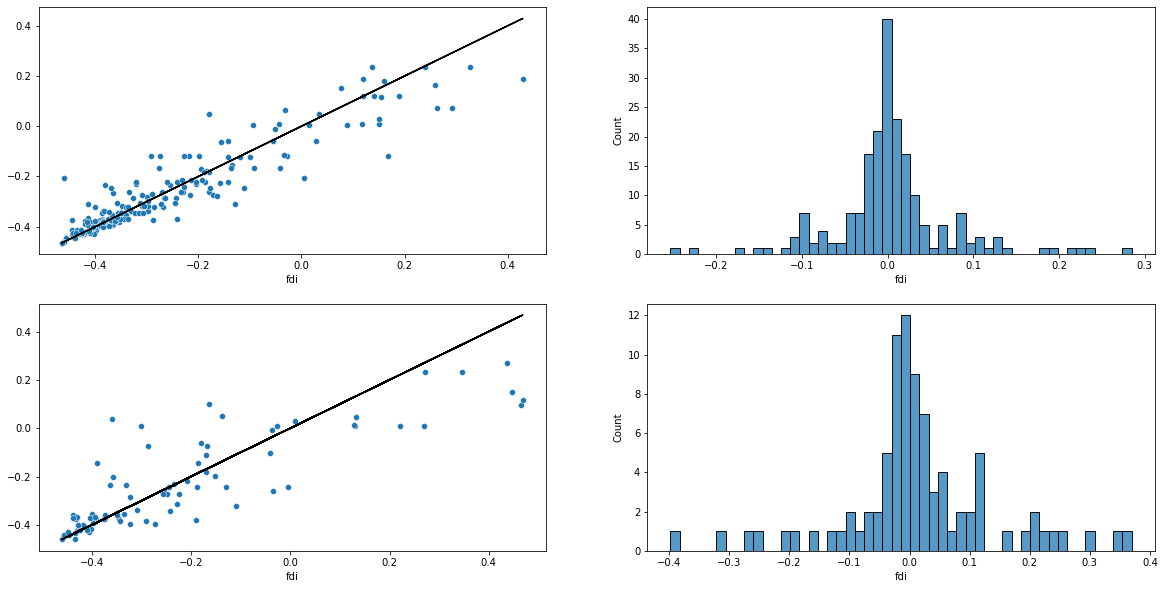

In [112]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.scatterplot(x=y_train, y=y_train_pred_knn, ax = ax[0,0])
sns.histplot(x=y_train-y_train_pred_knn, ax = ax[0,1], bins = 50)
ax[0,0].plot(y_train, y_train, color = "black")
sns.scatterplot(x=y_test, y=y_test_pred_knn, ax = ax[1,0])
sns.histplot(x=y_test-y_test_pred_knn, ax = ax[1,1], bins=50)
ax[1,0].plot(y_test, y_test, color="black")
plt.show()

In [ ]:
#metrics = pd.DataFrame({'Model': ['Linear Model', 'K-NN'], 'Train': ['RMSE_LM','RMSE_KNN'], 'Test': ['RMSE_LM', 'RMSE_KNN']})

In [ ]:
#pd.DataFrame{'y_train': y_train, 'y_train_pred_lm': y_train_pred_lm, 'Residuals_train_lm': y_train - y_train_pred_lm, 'y_train_pred_knn': y_train_pred_knn, 'Residuals_train_knn': }

In [113]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [116]:
import shap
print(shap.__version__)

0.40.0


In [129]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [122]:

from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()

In [130]:

import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [131]:
y = numeric_FDI3['fdi']
X = numeric_FDI3.drop(columns='fdi') 

In [132]:
model = xgb.XGBRegressor(objective="reg:squarederror") 
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [135]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


# how much each factor contributed to the model’s prediction when compared to the mean prediction

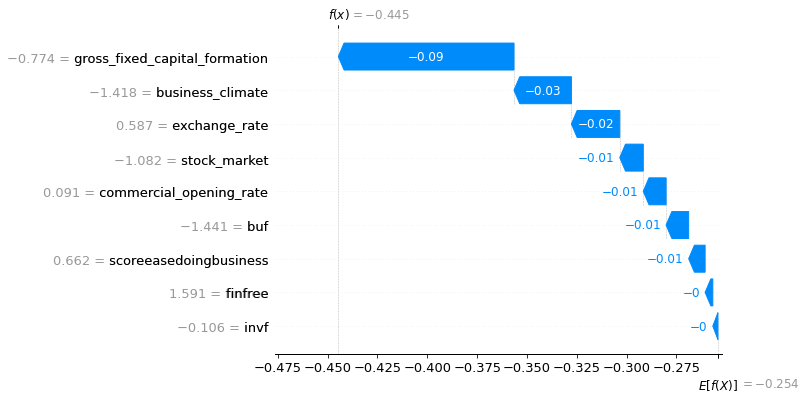

In [136]:
shap.plots.waterfall(shap_values[0])

#Looking at the x-axis, we can see the base value is E[f(x)] = -0,254. This is the average predicted number of fdi. The ending value is f(x) = -0,445. This is the predicted number of fdi for this abalone. The SHAP values are all the values in between. For example, the business climatet decreased the predicted number of fdi by 0,03 when compared to the average predicted fdi.

#There will be a unique waterfall plot for every observation/abalone in our dataset. They can all be interpreted in the same way as above. In each case, the SHAP values tell us how much each factor contributed to the model’s prediction when compared to the mean prediction. Large positive/negative SHAP values indicate that the feature had a significant impact on the model’s prediction.

# Force Plot

#Another way to visualise SHAP values is using a force plot. These give us pretty much the same information as a waterfall plot

In [137]:
shap.plots.force(shap_values[0])

#you can see we start at the same base value of-0,2542 . You can also see how each feature increases/decrease the predicted value to give us the final prediction of 0,44.

# Decision Plot

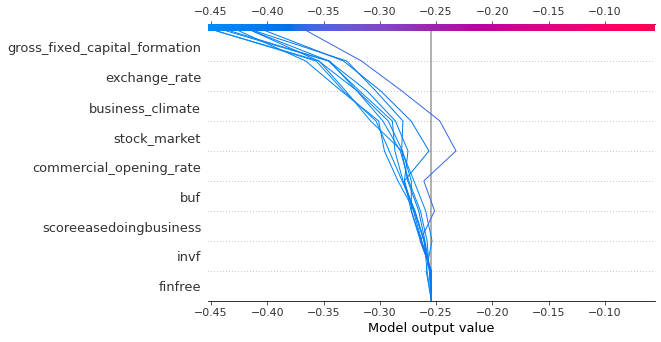

In [139]:
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X.columns))

#here, we can see there are 10 lines in the plot —one for each abalone. They all start at the same base value of -0,45 and end at their final predicted number of fdi. As you move up from each feature on the y-axis, the movement on the x-axis is given by the SHAP value for that feature. Ultimately, this gives you similar information to a waterfall plot except we can now see it for multiple observations
#With only 10 observations, we can already see some trends. For example, some of the lines seem to zig-zag at the top of the chart. For these observations, all variables here decrease the prediction (i.e. negative SHAP). In other words, these features have opposite effects on the prediction..

# the mean of all predictions

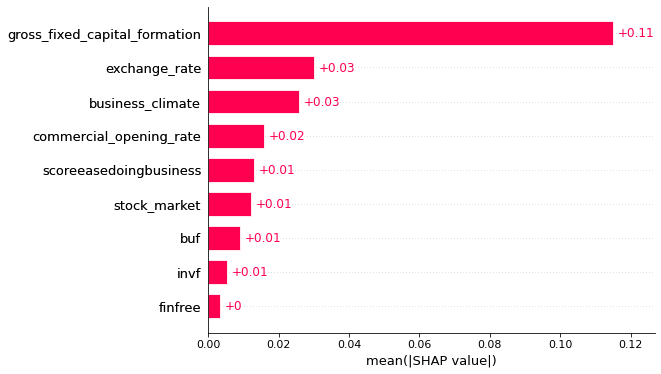

In [140]:
shap.plots.bar(shap_values)

#In the waterfall above, the x-axis has the values of the fdi . x is the chosen observation, f(x) is the predicted value of the model, given input x and E[f(x)] is the expected value of the target variable, or in other words, the mean of all predictions

# contribution 

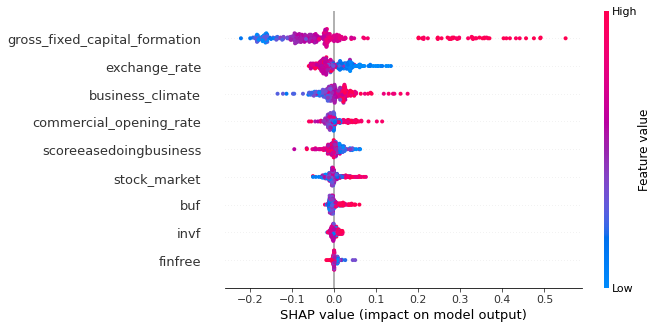

In [141]:
shap.plots.beeswarm(shap_values)

#For example, high values of the gross fixed capital formarion variable have a high positive contribution on the prediction, while low values have a high negative contribution. for the variable inf frinfree buf have  almost no contribution to the prediction, whether its values are high oAll variables are shown in the order of global feature importance, the first one being the most important and the last being the least important one.r low.
#All variables are shown in the order of global feature importance, the first one being the most important and the last being the least important one.

In [124]:
model_knn = neighbors.KNeighborsRegressor(n_neighbors = 4)
model_knn.fit(X_train, y_train) 

KNeighborsRegressor(n_neighbors=4)

In [125]:
model_knn.fit(X, y)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
shape.plots.waterfall(shap_values[x])

# Predictions on the test dataset

In [ ]:
#from sklearn.neighbors import KNeighborsRegressor
#neigh = KNeighborsRegressor(n_neighbors=1)
#neigh.fit(X, y)
#KNeighborsRegressor(n_neighbors=2)
#print(neigh.predict([[1.5]]))


# lm regression

In [146]:


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

y = y_train
X = X_train

model_lm = linear_model.LinearRegression()
model_lm.fit(X_train,y_train)
print(model_lm.intercept_)
print(model_lm.coef_)
print(model_lm.score(X,y))

-0.2268178055327843
[ 0.01731292 -0.02147666  0.1704592   0.06418513 -0.01069795  0.00590873
 -0.01554055  0.03441575  0.02247452]
0.6751111932370455


In [147]:
model_lm

LinearRegression()

In [148]:
X_train.describe()

,commercial_opening_rate,exchange_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,buf,invf,finfree,stock_market
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.006772,0.036957,-0.246006,0.068428,0.087028,0.028068,0.055928,0.067771,-0.055059
std,0.712744,1.027162,0.840171,1.065072,1.004910,1.015483,0.982311,0.968844,1.022668
min,-1.369673,-1.527504,-2.293179,-2.631364,-2.735960,-2.780774,-2.198074,-1.879919,-2.359208
25%,-0.493443,-0.973609,-0.620562,-0.617441,-0.634833,-0.643083,-0.106297,-0.546767,-0.729701
50%,-0.012408,0.337367,-0.186138,-0.043980,0.073728,0.017718,0.138898,-0.005062,-0.136411
75%,0.425141,0.731035,0.329373,0.878653,0.814196,0.667692,0.683041,0.742700,0.548552
max,3.148435,2.024589,1.470689,1.870386,2.349911,2.238813,1.950404,1.591057,2.573010


# we train/fit our model and evaluate it

In [149]:
from sklearn.metrics import r2_score

y_pred_train = model_lm.predict(X_train_minmax_scaled)
y_pred_test  = model_lm.predict(X_test_minmax_scaled)
r2_score(y_train, y_pred_train)


from sklearn.metrics import r2_score
y_pred = model_lm.predict(X)
r2_score_train= r2_score(y, y_pred)
print (r2_score_train)


0.6751111932370455


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


In [150]:
print(round(model_lm.intercept_,1))
print(model_lm.coef_.round(1))
print("r^2: ",round(model_lm.score(X_train_minmax_scaled,y_train),2))

-0.2
[ 0.  -0.   0.2  0.1 -0.   0.  -0.   0.   0. ]
r^2:  -0.67


X does not have valid feature names, but LinearRegression was fitted with feature names


In [151]:
y_pred_train_lm = model_lm.predict(X_train_minmax_scaled)
print(y_pred_train_lm )

[ 3.39752104e-03 -5.51619834e-02 -8.86675380e-02 -1.40661135e-02
 -1.03851602e-01 -9.80572856e-02 -1.02361575e-01 -8.74590115e-02
 -3.37367292e-02 -1.27357815e-01 -8.93487834e-02 -1.02412192e-01
 -9.82505445e-02 -3.71179353e-02 -3.87293775e-02 -1.03023833e-01
 -5.68773094e-02 -1.52646569e-01 -9.19189772e-02 -9.17346469e-02
 -8.74398950e-02 -7.03181646e-02 -3.06665757e-02 -7.63720222e-02
 -5.84813202e-02 -8.74700723e-02 -9.17721464e-02 -6.84033263e-02
 -1.24989477e-01 -1.40708170e-01 -1.00819868e-02 -1.04554667e-01
 -6.49333047e-02 -7.95410855e-02 -6.59595868e-02 -6.31260295e-02
 -7.22445926e-02 -1.02947902e-01 -8.77684725e-02 -8.83042766e-02
 -7.93971784e-02 -8.65197339e-02  1.27044710e-03 -8.99613773e-02
 -6.50659287e-02 -7.01900411e-02 -1.24652368e-01 -1.01938608e-01
 -7.52828701e-02 -1.38577374e-04 -2.29666836e-02 -8.86016977e-02
 -6.35128810e-02 -1.11532385e-01 -1.04431392e-01 -1.19422408e-01
 -6.63342785e-02 -1.21156116e-01 -7.58028617e-02 -1.24087915e-01
 -2.49615493e-02 -6.58667

X does not have valid feature names, but LinearRegression was fitted with feature names


In [152]:
y_pred_test_lm  = model_lm.predict(X_test_minmax_scaled)
print (y_pred_test_lm)

[-0.10585353 -0.14045105 -0.09438871 -0.08764028 -0.12372341 -0.07987507
 -0.04726007 -0.07637566 -0.08009652 -0.09195833 -0.03118099 -0.13954117
 -0.09119488 -0.14351437 -0.03914735 -0.07604216 -0.12667371 -0.14395826
 -0.0094749  -0.01986981 -0.04945272 -0.09080951 -0.10402028 -0.05654163
 -0.10674121 -0.09928269 -0.06231308 -0.09469386 -0.09684319 -0.14600275
 -0.09385321 -0.12651034 -0.06690554 -0.07823015 -0.04947186 -0.09595374
 -0.02585264 -0.06625981 -0.02838368 -0.05996539 -0.0555988  -0.10634224
  0.00108334 -0.07586194 -0.00848372  0.00039542 -0.15912934 -0.08097497
 -0.00148076 -0.09544442 -0.00454329 -0.11970179 -0.04964471 -0.09188464
  0.00103136 -0.09869667 -0.01069612 -0.06567746 -0.10148762 -0.08092331
 -0.03703836 -0.12681927 -0.10002044 -0.13561633 -0.02515498 -0.09706998
 -0.00272781 -0.02621492 -0.10439686 -0.04563259 -0.13752801 -0.06525631
 -0.07621882 -0.03288454 -0.12762164 -0.05938567 -0.09071431 -0.04336338
 -0.05507989 -0.07033382 -0.08709851 -0.06341739 -0

X does not have valid feature names, but LinearRegression was fitted with feature names


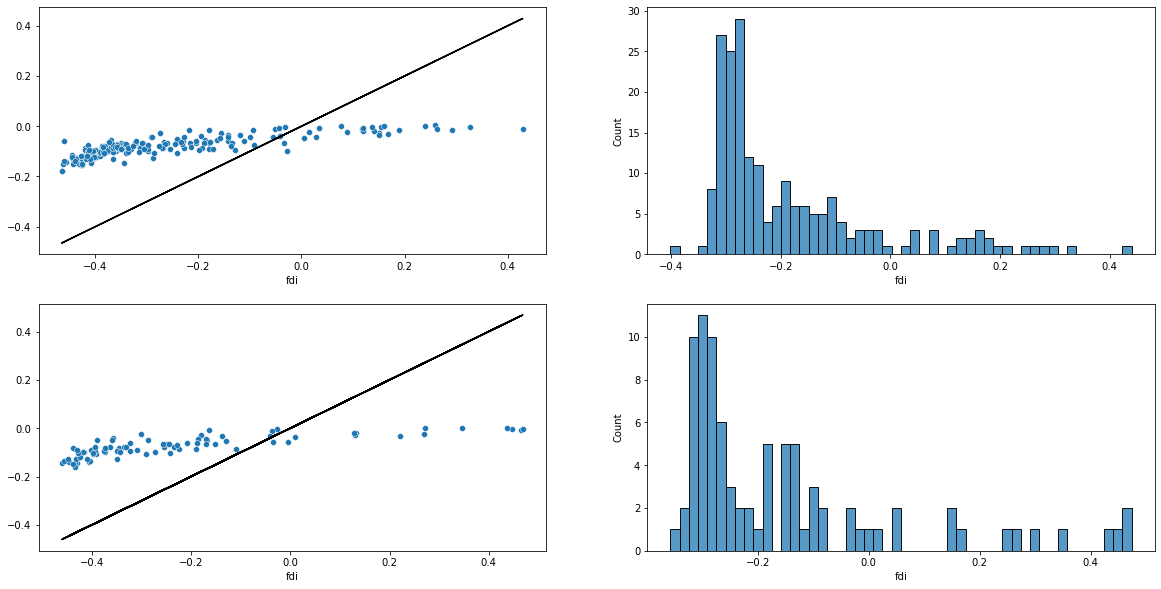

In [153]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.scatterplot(x=y_train, y=y_pred_train, ax = ax[0,0])
sns.histplot(x=y_train-y_pred_train, ax = ax[0,1], bins = 50)
ax[0,0].plot(y_train, y_train, color = "black")
sns.scatterplot(x=y_test, y=y_pred_test, ax = ax[1,0])
sns.histplot(x=y_test-y_pred_test, ax = ax[1,1], bins=50)
ax[1,0].plot(y_test, y_test, color="black")
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

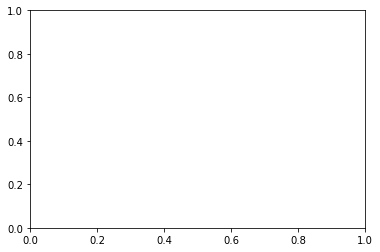

In [154]:
fig, ax = plt.subplots()
sns.scatterplot(X_train_minmax_scaled['gross_fixed_capital_formation'].values,y_train)
plt.show()

# Evaluation of the TEST portion of the data, that we did not use for training.

In [155]:
y_pred_test = model_lm.predict(X_test)
r2_score_test = r2_score(y_test, y_pred_test)
print (r2_score_test)

0.6298723801334827


In [ ]:
#regression_line = lm.intercept_ + lm.coef_[0]*numeric_FDI3['stock market'] # b_0 + b_1 * x
#plt.plot(numeric_FDI3['stock market'], regression_line, c = 'orange')
#sns.scatterplot(x='stock market',y='fdi',data=numeric_FDI3)
#plt.show()

# Checking linearity

In [ ]:
np.random.seed(29)
x = np.random.randn(200)

In [ ]:
y = x * 10 + np.random.randn(200) * 2

In [ ]:
numeric_FDI3 = pd.DataFrame([x, y]).T
numeric_FDI3.columns = ['X', 'y']

In [ ]:
sns.lmplot(x="X", y="y", data=numeric_FDI3, order=1)
plt.ylabel('fdi')
plt.xlabel('stock market')

# checking relation

In [156]:
import scipy.stats as st

In [157]:
numeric_FDI3

,commercial_opening_rate,exchange_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,buf,invf,finfree,stock_market,fdi
0,0.091316,0.587494,-0.774379,-1.417695,0.661596,-1.440617,-0.106297,1.591057,-1.081706,-0.444693
1,0.305318,0.619904,-0.707284,-1.895417,0.661596,-1.440617,-0.106297,1.591057,-1.580889,-0.431908
2,0.414890,0.648266,-0.639883,-1.055946,0.661596,0.198081,0.896537,1.591057,-1.517545,-0.444369
3,0.480856,0.647921,-0.590864,-2.088493,0.661596,0.175398,0.387938,0.742700,-1.061439,-0.436306
4,0.455876,0.646282,-0.524810,-2.399586,0.661596,-0.038130,0.387938,0.742700,-0.943724,-0.410158
...,...,...,...,...,...,...,...,...,...,...
325,0.022737,-1.213818,1.021005,1.063682,2.190009,-0.540268,0.221498,0.232769,-0.402052,-0.043602
326,0.012928,-1.086020,1.072169,0.840255,1.490001,-0.540268,0.221498,-0.005062,-0.470490,0.116868
327,0.009179,-1.023403,1.084916,0.876499,1.092581,-0.331803,0.896537,1.014495,-0.567819,-0.026669
328,0.011055,-0.909239,1.130210,0.759630,0.973696,-1.226457,-0.583853,-0.838003,-0.274145,-0.093661


In [158]:
matrix_donors = numeric_FDI3['fdi']
matrix_donors

0     -0.444693
1     -0.431908
2     -0.444369
3     -0.436306
4     -0.410158
         ...   
325   -0.043602
326    0.116868
327   -0.026669
328   -0.093661
329   -0.051258
Name: fdi, Length: 290, dtype: float64

In [159]:

FDI4 = pd.crosstab(numeric_FDI3['stock_market'] , numeric_FDI3['fdi'], margins = False)
FDI4

fdi,-0.465033,-0.463561,-0.463301,-0.460892,-0.459917,-0.459837,-0.457060,-0.456806,-0.456438,-0.447075,...,0.268795,0.271531,0.291692,0.326676,0.345767,0.429047,0.436222,0.447487,0.465327,0.468611
stock_market,,,,,,,,,,,,,,,,,,,,,
-2.359208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2.355461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2.355391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2.353515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2.351350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.312726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.328118,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2.399625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# compute chi2 

In [160]:
st.chi2_contingency(FDI4)

(83810.0,
 0.23949637231211704,
 83521,
 array([[0.00344828, 0.00344828, 0.00344828, ..., 0.00344828, 0.00344828,
         0.00344828],
        [0.00344828, 0.00344828, 0.00344828, ..., 0.00344828, 0.00344828,
         0.00344828],
        [0.00344828, 0.00344828, 0.00344828, ..., 0.00344828, 0.00344828,
         0.00344828],
        ...,
        [0.00344828, 0.00344828, 0.00344828, ..., 0.00344828, 0.00344828,
         0.00344828],
        [0.00344828, 0.00344828, 0.00344828, ..., 0.00344828, 0.00344828,
         0.00344828],
        [0.00344828, 0.00344828, 0.00344828, ..., 0.00344828, 0.00344828,
         0.00344828]]))

# CHEcKING Multicollinearity and  Variance Inflation Factor

In [ ]:
sns.heatmap(numeric_FDI3.corr(), annot=True)
plt.show()

#we suspect that fdi correlated with the other

In [161]:
numeric_FDI3['total'] = numeric_FDI3['commercial_opening_rate'] +numeric_FDI3['gross_fixed_capital_formation'] +numeric_FDI3['business_climate'] +numeric_FDI3['scoreeasedoingbusiness'] +numeric_FDI3['buf'] +numeric_FDI3['invf']+numeric_FDI3['finfree']+numeric_FDI3['stock_market'] 
numeric_FDI3.head()

,commercial_opening_rate,exchange_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,buf,invf,finfree,stock_market,fdi,total
0,0.091316,0.587494,-0.774379,-1.417695,0.661596,-1.440617,-0.106297,1.591057,-1.081706,-0.444693,-2.476724
1,0.305318,0.619904,-0.707284,-1.895417,0.661596,-1.440617,-0.106297,1.591057,-1.580889,-0.431908,-3.172532
2,0.414890,0.648266,-0.639883,-1.055946,0.661596,0.198081,0.896537,1.591057,-1.517545,-0.444369,0.548787
3,0.480856,0.647921,-0.590864,-2.088493,0.661596,0.175398,0.387938,0.742700,-1.061439,-0.436306,-1.292307
4,0.455876,0.646282,-0.524810,-2.399586,0.661596,-0.038130,0.387938,0.742700,-0.943724,-0.410158,-1.658141


In [162]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [163]:
y = numeric_FDI3['fdi']
X = numeric_FDI3[['commercial_opening_rate','gross_fixed_capital_formation','business_climate','scoreeasedoingbusiness','buf','invf','finfree','stock_market']] 
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [164]:
KNN = model_knn.fit(X_train, y_train)

In [165]:
y_pred = model_knn.predict(X_test)

In [166]:
r2_score(y_pred,y_test)

0.5628841602209593